ニューラルネットワーク　スクラッチ

MNISTデータセットを使用。

画像分類のための定番データセットで、手書き数字認識を行います

In [18]:
import numpy as np

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape) # (60000, 28, 28)
print(x_test.shape) # (10000, 28, 28)
print(x_train[0].dtype) # uint8
print(x_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [7]:
#フラットにする
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

In [13]:
 X_train.shape

(60000, 784)

補足

ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

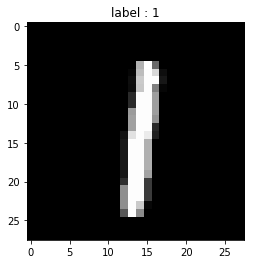

In [16]:
#可視化
import matplotlib.pyplot as plt
%matplotlib inline
index = 40
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

発展的話題

画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。

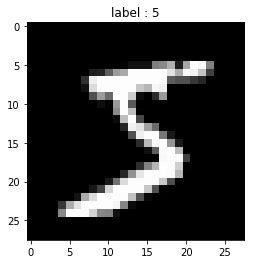

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [19]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

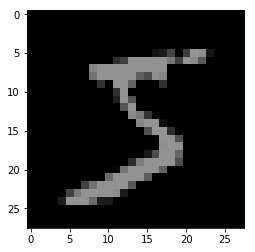

In [21]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

前処理

画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。色は理想的には連続値であり、それを特徴量とするからです。以下のコードで変換可能です。



In [22]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際にはone-hot表現に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

In [343]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


さらに、学習用データ6万枚の内2割を検証用データとして分割してください。学習用データが48000枚、検証用データが12000枚となります。

In [367]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(38400, 784)
(9600, 784)


# 【問題1】ニューラルネットワーク分類器のクラスを作成
ニューラルネットワーク分類器のクラスScratchSimpleNeuralNetrowkClassifierを作成してください。

以下が雛形です。基本的な構成は機械学習編の線形回帰やロジスティック回帰などと同様です。

In [51]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop
    
    #Pythonの特殊メソッドのひとつで、オブジェクトに角括弧でアクセスしたときの挙動を定義できる。
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [562]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------
    alpha : float
        学習率
    varbose : bool
        学習過程の表示
    batch_size : int
        １つのバッチのサンプル数
    epoch : int
        エポック数
    metrics : str
        評価指標の選択
        acc = accuracy
        
    Attributes
    ----------
    train_loss : ndarray, shape(epoch, )
        トレインデータのlossを格納していく
    val_loss : ndarray, shape(epoch, )
        valデータのlossを格納していく    
    W1 : ndarray, shape(n_features, n_nodes1)
    W2 : ndarray, shape(n_nodes1, n_nodes2)
    W3 : ndarray, shape(n_nodes2, n_nodes3)
        重み
    b1 : ndarray, shape(1, n_nodes1)
    b2 : ndarray, shape(1, n_nodes2)
    b3 : ndarray, shape(1, n_nodes3)
        バイアス
    """

    def __init__(self, alpha=0.001, verbose=True, batch_size=50, epoch=10, metrics="acc"):
        self.verbose = verbose
        self.alpha = alpha
        self.batch_size = batch_size
        self.epoch = epoch
        self.metrics = metrics
        self.train_loss = np.zeros(epoch)
        self.val_loss = np.zeros(epoch)
        self.W1 = 0
        self.W2 = 0
        self.W3 = 0
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def fit(self, X, y, X_val=None, y_val=None, alpha=0.001):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        if y.ndim == 1:
            y = y[:, np.newaxis]
        
        if np.any(y_val):
            if y_val.ndim == 1:
                y_val = y_val[:, np.newaxis]
        
        #バイアスの追加
        #m = len(X)
        #X= np.hstack(np.onez(m).reshape(m,1), X)
        
        #wの初期化
        n_features = X.shape[1]
        n_nodes1 = 400
        sigma = 0.01 # ガウス分布の標準偏差
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.b1 =  sigma * np.random.randn(1, n_nodes1)
        
        n_nodes2 = 200
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2) #shape(該当するレイヤーのノード数, 次のレイヤーのノード数)
        self.b2 = sigma * np.random.randn(1, n_nodes2) 
        
        n_nodes3 = 10
        self.W3 = sigma * np.random.randn(n_nodes2, n_nodes3) #shape(該当するレイヤーのノード数, 次のレイヤーのノード数)
        self.b3 = sigma * np.random.randn(1, n_nodes3) 
        
        for i in range(self.epoch):

            #バッチ作成
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=0)

            for mini_X_train, mini_y_train in get_mini_batch:
                # このfor文内でミニバッチが使える
                #FP
                a1 = np.dot(mini_X_train, self.W1) + self.b1
                #z1 = self._sigmoid(a1)
                z1 = self._tanh(a1)
                a2 = np.dot(z1, self.W2) + self.b2
                #z2 = self._sigmoid(a2)
                z2 = self._tanh(a2)
                a3 = np.dot(z2, self.W3) + self.b3
                z3 = self._soft_max(a3)
                
                loss = self._cross_entropy_loss(z3, mini_y_train)
                #print(loss)

                #BP
                a3_L = z3 - mini_y_train
                z2_L = np.dot(a3_L, self.W3.T) #shape(サンプル数、レイヤー2のユニット数）
                self.W3 = self.W3 - self.alpha * np.dot(z2.T, a3_L)
                self.b3 = self.b3 - self.alpha * np.mean(a3_L, axis=0)

                #sigmoid 
                #a2_L = z2_L  *  (1 - z2) * z2  #shape(サンプル数、レイヤー2のユニット数）
                #tanh
                a2_L = z2_L  *  (1 - z2**2) #shape(サンプル数、レイヤー2のユニット数）
                z1_L = np.dot(a2_L,  self.W2.T)   #shape(サンプル数、レイヤー1のユニット数）
                self.W2 = self.W2 - self.alpha * np.dot(z1.T, a2_L)
                self.b2 = self.b2 - self.alpha * np.mean(a2_L, axis=0)

                #sigmoid
                #a1_L = z1_L * (1 - z1) * z1 #shape(サンプル数、レイヤー1のユニット数）
                #tanh
                a1_L = z1_L * (1 - z1**2) #shape(サンプル数、レイヤー1のユニット数）
                self.W1 = self.W1 - self.alpha * np.dot(mini_X_train.T, a1_L)
                self.b1 = self.b1 - self.alpha * np.mean(a1_L, axis=0)
            
            #評価値の表示
            train_pred = self._hypothesis(X)
            self.train_loss[i] = self._cross_entropy_loss(train_pred, y)
            
            if np.any(X_val):
                val_pred = self._hypothesis(X_val)
                self.val_loss[i] = self._cross_entropy_loss(val_pred, y_val)
                met = self.accuracy(np.argmax(y_val, axis=1), np.argmax(val_pred, axis=1))
                      
                if self.verbose:
                    print("epoch:{0} train_loss: {1} val_loss: {2} {3}: {4}".format(i+1, self.train_loss[i], self.val_loss[i], self.metrics, met))
                    
            else:
                if self.verbose:
                      print("epoch:{0} loss: {1}".format(i+1, self.train_loss[i]))
                            
                
    def _hypothesis(self, X):
        
        a1 = np.dot(X, self.W1) + self.b1
        #z1 = self._sigmoid(a1)
        z1 = self._tanh(a1)
        a2 = np.dot(z1, self.W2) + self.b2
        #z2 = self._sigmoid(a2)
        z2 = self._tanh(a2)
        a3 = np.dot(z2, self.W3) + self.b3
        z3 = self._soft_max(a3)
        
        return z3

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        
        h = self._hypothesis(X)
        return np.argmax(h, axis=1)
    
    def _sigmoid(self, z):
        
        return 1 / (1 + np.exp(-z))
    
    def _tanh(self, z):
        
        return np.tanh(z)
    
    def _soft_max(self, z):
        
        c = np.max(z)
        z = z - c
        ex = np.exp(z)
        #print(np.sum(ex / (np.sum(ex, axis=1)).reshape(len(z), 1), axis=1))
        return ex / (np.sum(ex, axis=1))[:, np.newaxis]
    
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            print(np.sum(y.T, axis=1))
            return y.T

        x = x - np.max(x)
        print(np.exp(x) / np.sum(np.exp(x)))
        return np.exp(x) / np.sum(np.exp(x))
    
    def _cross_entropy_loss(self,z, y):
        
        return - sum(sum(y * np.log(z))) / len(y)
    
    def plot_learning_curve(self):
        """
        学習曲線をプロットします。

        loss : array
        一回ごとの勾配降下方のロスのログ(train)
         val_los : array
        一回ごとの勾配降下方のロスのログ(val or test)
        """
        plt.figure(figsize=(8, 5))
        plt.title("model_loss")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.plot(self.train_loss, label="train_loss")
        plt.plot(self.val_loss, label="val_loss")
        #plt.yscale("log")
        plt.legend()
        
    def accuracy(self, y, y_pred):
        # accuracyを計算して返す
        return accuracy_score(y, y_pred)
    
    
    def _plot_wrong_image(self, X, y, y_pred):
        #まちがえている画像をプロットします
        
        num = 36 # いくつ表示するか

        true_false = y_pred == y
        false_list = np.where(true_false==False)[0].astype(np.int)

        if false_list.shape[0] < num:
            num = false_list.shape[0]
        fig = plt.figure(figsize=(6, 6))
        fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
        for i in range(num):
            ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
            ax.set_title("{} / {}".format(y_pred[false_list[i]],y[false_list[i]]))
            ax.imshow(X.reshape(-1,28,28)[false_list[i]], cmap='gray')

In [565]:
model = ScratchSimpleNeuralNetrowkClassifier(epoch=40, alpha=0.01)

# 【問題2】学習曲線のプロット
# 【問題3】指標値の算出

model = ScratchSimpleNeuralNetrowkClassifier(epoch=20)

In [566]:
model.fit(X_train, y_train, X_val, y_val)

epoch:1 train_loss: 0.27587522879443294 val_loss: 0.30264952596692796 acc: 0.9078125
epoch:2 train_loss: 0.15929817205370694 val_loss: 0.1930503757933752 acc: 0.9403125
epoch:3 train_loss: 0.1283326083656884 val_loss: 0.1743426263913887 acc: 0.9467708333333333
epoch:4 train_loss: 0.08285023065798237 val_loss: 0.13996118676837224 acc: 0.9572916666666667
epoch:5 train_loss: 0.08378436332684355 val_loss: 0.1525070311544823 acc: 0.9570833333333333
epoch:6 train_loss: 0.04390957358043855 val_loss: 0.12026022767270722 acc: 0.9664583333333333
epoch:7 train_loss: 0.03604183323355153 val_loss: 0.12301413872293789 acc: 0.9670833333333333
epoch:8 train_loss: 0.023839929860751913 val_loss: 0.10904656794724282 acc: 0.9694791666666667
epoch:9 train_loss: 0.017339967206860384 val_loss: 0.11195599219831971 acc: 0.9708333333333333
epoch:10 train_loss: 0.01112000061157098 val_loss: 0.11046103904585208 acc: 0.9707291666666666
epoch:11 train_loss: 0.0075784067539024875 val_loss: 0.11413186857613186 acc: 0

In [568]:
y_pred = model.predict(X_test)

In [569]:
#accuracyの表示
model.accuracy(y_test, y_pred )

0.9759

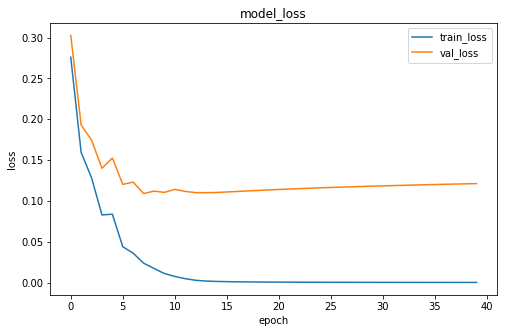

In [570]:
model.plot_learning_curve()

# （オプション）誤分類の確認

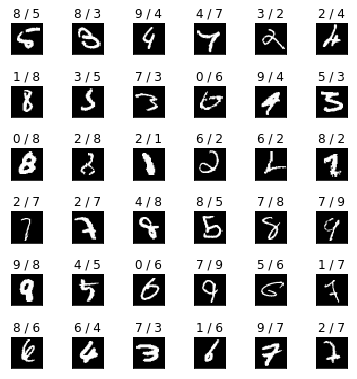

In [571]:
"""
誤分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証用データの正解ラベル(n_samples,)
X_val : 検証用データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 36 # いくつ表示するか

true_false = y_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')

ミニバッチ処理

これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する確率的勾配降下法が一般的です。分割した際のひとかたまりをミニバッチ、そのサンプル数をバッチサイズと呼びます。

今回はバッチサイズを10とします。今回使う学習用データは48000枚ですから、4800回の更新を繰り返すことになります。ニューラルネットワークではこれを4800回イテレーション（iteration）すると呼びます。学習データを一度全て見ると1回のエポック（epoch）が終わったことになります。このエポックを複数回繰り返し、学習が完了します。

これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

__getitem__や__next__は__init__などと同じ特殊メソッドの一種です。

In [50]:
# 以下をニューラルネットワークのクラス内で呼び出す

get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=10)

print(len(get_mini_batch)) # 4800
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    

4800
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([4, 6, 8, 8, 4, 9, 8, 9, 1, 2], dtype=uint8))
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(1

(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784

(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(1

(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(1

(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(1

(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784)
(10,)
(10, 784

重みの初期値

ニューラルネットワークにおいては重みの初期値は重要な要素です。様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。

以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [54]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)